In [17]:
from bs4 import BeautifulSoup
import requests

<h1><b>Normal Web scraping</b></h1>

In [18]:
url = 'https://www.set.or.th/th/home'
page = requests.get(url) #get access to set website
soup = BeautifulSoup(page.content, 'html.parser') #parse the html content to str

In [19]:
html_SET = soup.find_all('table')[1] #find table tag in html

In [20]:
import pandas as pd
import numpy as np

In [21]:
SET = pd.read_html(str(html_SET))[0]
SET

C:\Users\Champ\AppData\Local\Temp\ipykernel_1532\76092912.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  SET = pd.read_html(str(html_SET))[0]


,ดัชนี,ล่าสุด,เปลี่ยนแปลง,ปริมาณ ('000 หุ้น)1,มูลค่า (ลบ.)1
0,SET,1141.28,2.38,6435591,29808.44
1,SET50,729.31,-1.00,1388709,22483.00
2,SET50FF,730.36,-0.03,1388709,22483.00
3,SET100,1572.32,0.24,1880817,25619.45
4,SET100FF,1578.12,2.35,1880817,25619.45
5,sSET,596.79,8.43,267279,822.34
6,SETCLMV,592.79,4.22,572864,15914.29
7,SETHD,1076.93,3.93,823985,11562.58
8,SETESG,726.31,1.12,1685645,24393.86
9,SETWB,635.25,-0.50,336290,6058.02


In [22]:
html_top5sell = soup.find_all('div', class_='row list-card-stock px-1')[0] #find div tag in html which has class name 'row list-card-stock px-1'

In [23]:
#find all the card in the top5sell and store in the list
top5sell = []
for card in html_top5sell:

    name = card.find('div', class_='symbol').text.strip()

    price = card.find('h3', class_='quote-last').text.strip()

    change_rate = card.find('div', class_='percent').text.strip()

    top5sell.append({'Name': name, 'Price': price, 'Change Rate': change_rate})

top5sell
top5sell = pd.DataFrame(top5sell)
top5sell

,Name,Price,Change Rate
0,KBANK,151.00,-3.50 (-2.27%)
1,BBL,146.50,+5.00 (+3.53%)
2,SCB,116.00,+2.50 (+2.20%)
3,KTB,21.80,+0.40 (+1.87%)
4,AOT,37.75,-0.50 (-1.31%)


<h1><b>Compare</b></h1>

In [24]:
url = 'https://www.set.or.th/th/market/product/stock/quote/'

In [25]:
company1 = 'KTB'
company2 = 'PTT'
stock1 = url + company1 + '/price' #price now page for set web url
stock2 = url + company2 + '/price'

In [26]:
page1 = requests.get(stock1)
soup = BeautifulSoup(page1.content, 'html.parser')
html_stock1 = soup.find_all('div', class_='cost-detail')[0]
page2 = requests.get(stock2)
soup2 = BeautifulSoup(page2.content, 'html.parser')
html_stock2 = soup2.find_all('div', class_='cost-detail')[0]

In [27]:
details_now = []

for detail in html_stock1.find_all('div', class_='item-list-details'): #see now details of the stock and append to list
    label = detail.find('label').text.strip()
    value = detail.find('span').text.strip()
    details_now.append({label: value})

#####

details2_now = []

for detail in html_stock2.find_all('div', class_='item-list-details'):
    label = detail.find('label').text.strip()
    value = detail.find('span').text.strip()
    details2_now.append({label: value})

In [28]:
print(company1)
details_now

KTB


[{'ล่าสุด': '21.80'},
 {'เปลี่ยนแปลง': '+0.40\n                  (+1.87%)'},
 {'สูงสุด': '22.00'},
 {'ต่ำสุด': '21.40'},
 {'ราคาปิดก่อนหน้า': '21.40'},
 {'ราคาเปิด': '21.50'},
 {'ปริมาณ (หุ้น)': '59,474,555'},
 {"มูลค่า ('000 บาท)": '1,292,312.83'},
 {'ราคาเฉลี่ย**': '21.73'},
 {'ราคาพาร์': '5.15'},
 {'ราคา Floor': '15.00'},
 {'ราคา Ceiling': '27.75'}]

In [29]:
print(company2)
details2_now

PTT


[{'ล่าสุด': '30.75'},
 {'เปลี่ยนแปลง': '-0.25\n                  (-0.81%)'},
 {'สูงสุด': '31.25'},
 {'ต่ำสุด': '30.75'},
 {'ราคาปิดก่อนหน้า': '31.00'},
 {'ราคาเปิด': '31.00'},
 {'ปริมาณ (หุ้น)': '17,116,323'},
 {"มูลค่า ('000 บาท)": '529,657.82'},
 {'ราคาเฉลี่ย**': '30.94'},
 {'ราคาพาร์': '1.00'},
 {'ราคา Floor': '21.70'},
 {'ราคา Ceiling': '40.25'}]

In [30]:
stock1 = url + company1 + '/historical-trading' #historical trading page for set web url
stock2 = url + company2 + '/historical-trading'
print(stock1 + '\n' + stock2)

https://www.set.or.th/th/market/product/stock/quote/KTB/historical-trading
https://www.set.or.th/th/market/product/stock/quote/PTT/historical-trading


In [31]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time

In [32]:
driver = webdriver.Chrome(options=Options().add_argument('--headless')) #open the browser in headless mode
driver.get(stock1) #get access to the stock1 url
time.sleep(5) #wait for 5 seconds
html_stock1 = driver.page_source #get the html content of the page
driver.quit()  #close the browser
soup = BeautifulSoup(html_stock1, "html.parser") #parse the html content to str

driver = webdriver.Chrome(options=Options().add_argument('--headless'))
driver.get(stock2)
time.sleep(5)
html_stock2 = driver.page_source
driver.quit()
soup2 = BeautifulSoup(html_stock2, "html.parser")

In [33]:
html_stock1 = soup.find_all('table')[1] #find table tag in html which is the second table of the page
html_stock2 = soup2.find_all('table')[1]

In [34]:
def get_data(html_stock): #get the data from the html content
    columns = {
        "date": "1",
        "open": "2",
        "highest": "3",
        "lowest": "4",
        "close": "5",
        "change": "6",
        "change_percent": "7",
        "quantity": "8",
        "value": "9"
    }

    data = {
        key: [td.get_text(strip=True) for td in html_stock.find_all("td", {"aria-colindex": col, "role": "cell"})] #get the text of the td tag
        for key, col in columns.items()
    }

    return data

def translate_date(date_list): #translate the thai month to english month cuz the set website use thai month but pandas use english month to sorted
    month_map = {
        'ม.ค.': 'JAN', 'ก.พ.': 'FEB', 'มี.ค.': 'MAR', 'เม.ย.': 'APR',
        'พ.ค.': 'MAY', 'มิ.ย.': 'JUN', 'ก.ค.': 'JUL', 'ส.ค.': 'AUG',
        'ก.ย.': 'SEP', 'ต.ค.': 'OCT', 'พ.ย.': 'NOV', 'ธ.ค.': 'DEC'
    }
    
    return [i.replace(thai, eng) for i in date_list for thai, eng in month_map.items() if thai in i]

In [35]:
#pd.read_html(str(html_stock1))[0]

In [36]:
#pd.read_html(str(html_stock2))[0]

In [37]:
data1 = get_data(html_stock1)
data2 = get_data(html_stock2)

In [38]:
data1 = {
    key: pd.to_numeric([v.replace(',', '') for v in value], errors='coerce') if key != 'date' else value #replace the comma in the number and convert to numeric
    for key, value in data1.items()
}
data2 = {
    key: pd.to_numeric([v.replace(',', '') for v in value], errors='coerce') if key != 'date' else value
    for key, value in data2.items()
}

In [39]:
date1 = data1['date'] #keep thai date in another variable
date2 = data2['date']

data1['date'] = translate_date(data1['date']) #then translate the thai date to english date
data2['date'] = translate_date(data2['date'])

In [40]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

df1['date'] = df1['date'].apply(lambda x: x[:-4] + str(int(x[-4:]) - 543)) #convert the thai year to gregorian year
df1['date'] = pd.to_datetime(df1['date'], format='%d %b %Y', dayfirst=True) #convert the date to datetime format
df2['date'] = df2['date'].apply(lambda x: x[:-4] + str(int(x[-4:]) - 543))
df2['date'] = pd.to_datetime(df2['date'], format='%d %b %Y', dayfirst=True)

In [41]:
df1

,date,open,highest,lowest,close,change,change_percent,quantity,value
0,2025-04-16,20.8,21.5,20.6,21.4,-1.2,-5.31,75275993,1584386.23
1,2025-04-11,22.4,22.7,22.2,22.6,-0.1,-0.44,68270944,1536196.01
2,2025-04-10,22.3,23.0,22.3,22.7,1.5,7.08,100338941,2267763.67
3,2025-04-09,20.8,21.4,20.7,21.2,0.3,1.44,87083990,1832731.81
4,2025-04-08,21.3,21.3,20.5,20.9,-1.8,-7.93,129208030,2694735.22
5,2025-04-04,23.6,23.7,22.6,22.7,-0.8,-3.40,82936435,1907500.02
6,2025-04-03,24.0,24.1,23.5,23.5,-0.8,-3.29,92011497,2182728.15
7,2025-04-02,24.2,24.3,24.1,24.3,0.1,0.41,32030295,775464.99
8,2025-04-01,24.2,24.5,24.1,24.2,0.1,0.41,34238874,830394.22
9,2025-03-31,24.0,24.3,24.0,24.1,-0.4,-1.63,46735463,1129572.09


In [42]:
df2

,date,open,highest,lowest,close,change,change_percent,quantity,value
0,2025-04-16,31.25,31.50,30.50,31.00,-0.50,-1.59,42886450,1331111.07
1,2025-04-11,30.75,31.50,30.25,31.50,0.75,2.44,53499192,1655578.35
2,2025-04-10,31.25,31.75,30.75,30.75,0.25,0.82,86098156,2689784.51
3,2025-04-09,30.00,30.50,30.00,30.50,0.25,0.83,54082700,1638277.74
4,2025-04-08,30.00,30.75,29.50,30.25,-1.25,-3.97,83118127,2501574.11
5,2025-04-04,31.75,32.25,31.00,31.50,-0.75,-2.33,61291519,1934489.76
6,2025-04-03,31.75,32.25,31.50,32.25,0.00,0.00,36827947,1179334.06
7,2025-04-02,31.75,32.25,31.75,32.25,0.25,0.78,32790074,1052235.15
8,2025-04-01,32.00,32.25,31.75,32.00,0.00,0.00,24897236,796430.57
9,2025-03-31,32.00,32.25,31.50,32.00,0.00,0.00,40305969,1285270.39


In [43]:
open_mean1 = np.mean([i for i in df1['open']]) #find mean
open_mean2 = np.mean([i for i in df2['open']]) 
open_std1 = np.std([i for i in df1['open']]) #find standard deviation
open_std2 = np.std([i for i in df2['open']])
print(company1,'\nmean:', open_mean1,'\nstandard deviation:', round(open_std1, 2), '\n', company2,'\nmean:', open_mean2,'\nstandard deviation:', round(open_std2, 2))

KTB 
mean: 23.3 
standard deviation: 1.13 
 PTT 
mean: 31.1625 
standard deviation: 1.1


In [44]:
import matplotlib.pyplot as plt

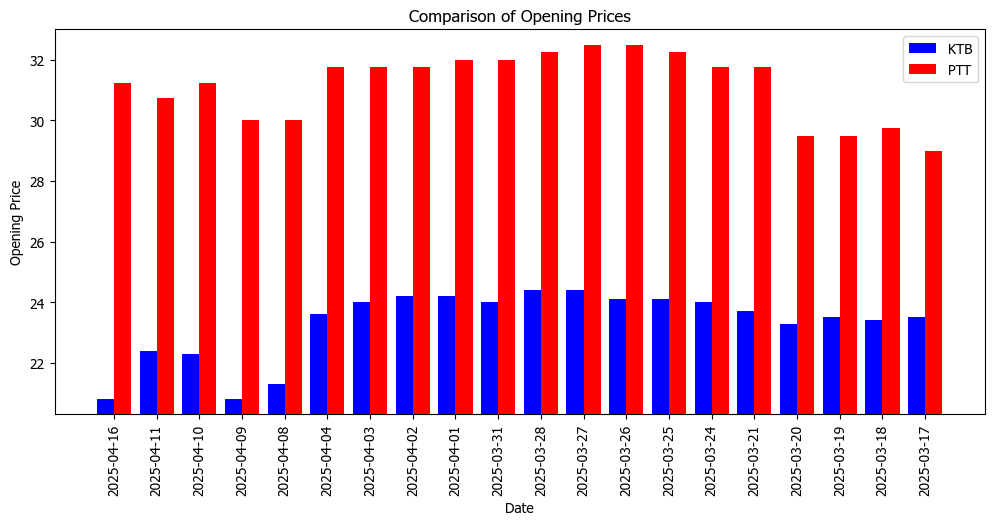

In [45]:
plt.rcParams['font.family'] = 'Tahoma'  # Set font
plt.figure(figsize=(12, 5))  # Set figure size

bar_width = 0.4
unique_dates = df1['date'].astype(str).tolist()
x_indexes = np.arange(len(unique_dates))  # Convert dates to index positions

# Plot grouped bars (shift each bar left and right)
plt.bar(x_indexes - bar_width/2, df1['open'], width=bar_width, color='blue', label=company1)
plt.bar(x_indexes + bar_width/2, df2['open'], width=bar_width, color='red', label=company2)

# X-axis settings
plt.xticks(ticks=x_indexes, labels=unique_dates, rotation=90)

# Y-axis limits
min_y = min(df1['open'].min(), df2['open'].min()) - 0.5
max_y = max(df1['open'].max(), df2['open'].max()) + 0.5
plt.ylim(min_y, max_y)

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Opening Price")
plt.title("Comparison of Opening Prices")
plt.legend()

# Show plot
plt.show()

<h1><b>Prediction</b</h1>

In [46]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [47]:
Company = 'TISCO'

In [48]:
raw_url = 'https://www.set.or.th/en/market/product/stock/quote/'
url = raw_url + Company + '/price'
url

'https://www.set.or.th/en/market/product/stock/quote/TISCO/price'

In [49]:
driver = webdriver.Chrome(options=Options().add_argument('--headless'))
driver.get(url)
time.sleep(5)
html = driver.page_source
driver.quit()
soup = BeautifulSoup(html, "html.parser")

In [50]:
table = soup.find('div', class_='price-important-stock-left')
# print(table.prettify())

In [51]:
highlight_html = table.find_all('div', class_='item-list-details')
highlight = []
for item in highlight_html:
    label_element = item.find('label')
    span_element = item.find('span')

    if label_element and span_element:
        label = label_element.text.strip()
        value = span_element.text.strip()
        highlight.append({label: value})

df_highlight = pd.DataFrame(highlight).ffill().dropna() #.iloc[0]
df_highlight

,Market Cap. (M.Baht),Price Performance (%)*,P/E,Dividend Yield (%),P/BV,Dividend (Baht/Shares),Beta*,XD Date,% Free Float
8,"79,063.76",0.25,11.46,7.85,1.84,2.00,0.29,10 Sep 2024,81.31


In [52]:
url = raw_url + Company + '/historical-trading'

In [53]:
driver = webdriver.Chrome(options=Options().add_argument('--headless'))
driver.get(url)
html = []

try:
    current_page = 1  # Assuming we start from page 1
    total_pages = 7    # Adjust this based on your total pages

    while current_page <= total_pages:
            # Wait for the next page button to be clickable
            next_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, f"//button[@role='menuitemradio' and @aria-label='Go to page {current_page}']"))
            )
            next_button.click()
            time.sleep(5)  # Allow page to load (Adjust based on website speed)
            current_page += 1
            html.append(driver.page_source)

finally:
    driver.quit()


In [54]:
soup = BeautifulSoup(html[0], "html.parser")
aaa = soup.find_all('table')[1]

In [55]:
html_table = []
for i in html:
    soup = BeautifulSoup(i, "html.parser")
    _html_table = soup.find_all('table')[1]
    df = pd.read_html(str(_html_table))[0]
    html_table.append(df)

C:\Users\Champ\AppData\Local\Temp\ipykernel_1532\4135469801.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(_html_table))[0]
C:\Users\Champ\AppData\Local\Temp\ipykernel_1532\4135469801.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(_html_table))[0]
C:\Users\Champ\AppData\Local\Temp\ipykernel_1532\4135469801.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(_html_table))[0]
C:\Users\Champ\AppData\Local\Temp\ipykernel_1532\4135469801.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. 

In [56]:
df = pd.concat(html_table, ignore_index=True)
df.columns = df.columns.str.replace(r"\s*\(Click to sort Ascending\)", "", regex=True)
df

,Date,Open,High,Low,Close,Change,% Change,Volume (Shares),Value ('000 Baht)
0,16 Apr 2025,98.25,99.25,98.25,98.75,1.00,1.02,4008809,395841.93
1,11 Apr 2025,98.00,98.25,97.50,97.75,-0.25,-0.26,3174489,310721.95
2,10 Apr 2025,97.25,98.50,97.25,98.00,1.75,1.82,3834707,375537.95
3,09 Apr 2025,95.75,96.50,95.25,96.25,0.00,0.00,9760483,934784.57
4,08 Apr 2025,96.00,97.00,95.00,96.25,-1.25,-1.28,12096590,1161316.65
...,...,...,...,...,...,...,...,...,...
116,24 Oct 2024,96.75,97.50,96.75,97.00,0.25,0.26,1355186,131627.98
117,22 Oct 2024,97.75,98.00,96.75,96.75,-1.00,-1.02,2995057,290947.79
118,21 Oct 2024,97.50,98.00,97.25,97.75,0.25,0.26,1605495,156579.23
119,18 Oct 2024,97.75,98.25,97.25,97.50,-0.25,-0.26,2413083,235670.56


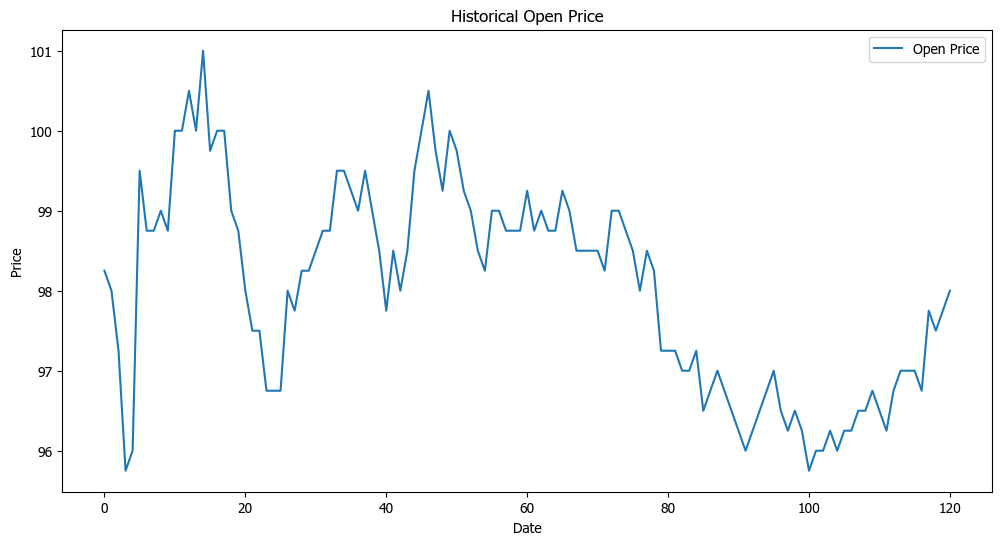

In [57]:
data = 'Open'
plt.figure(figsize=(12,6))
plt.plot(df.index, df[data], label=f"{data} Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"Historical {data} Price")
plt.legend()
plt.show()

<h1><b>RandomForestRegressor</b><h1>

In [64]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

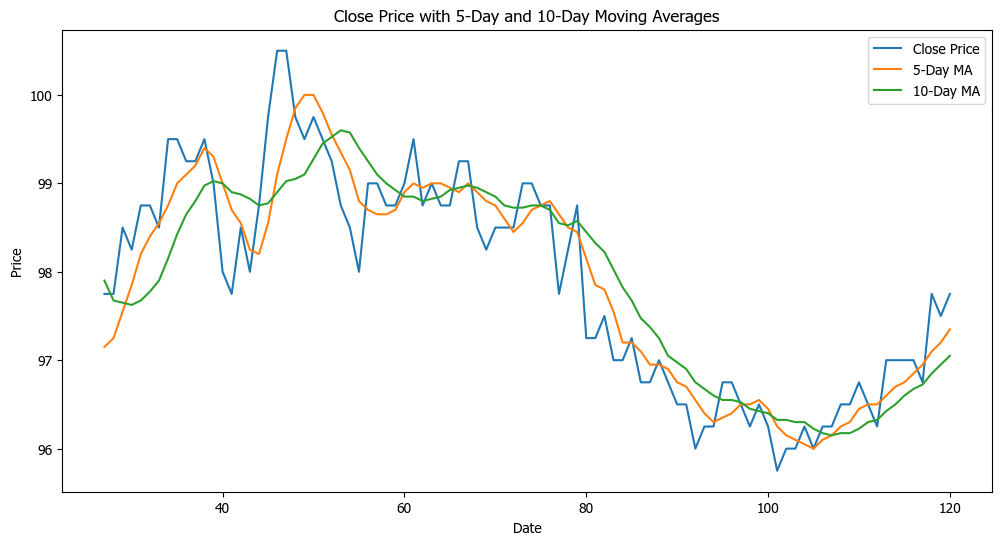

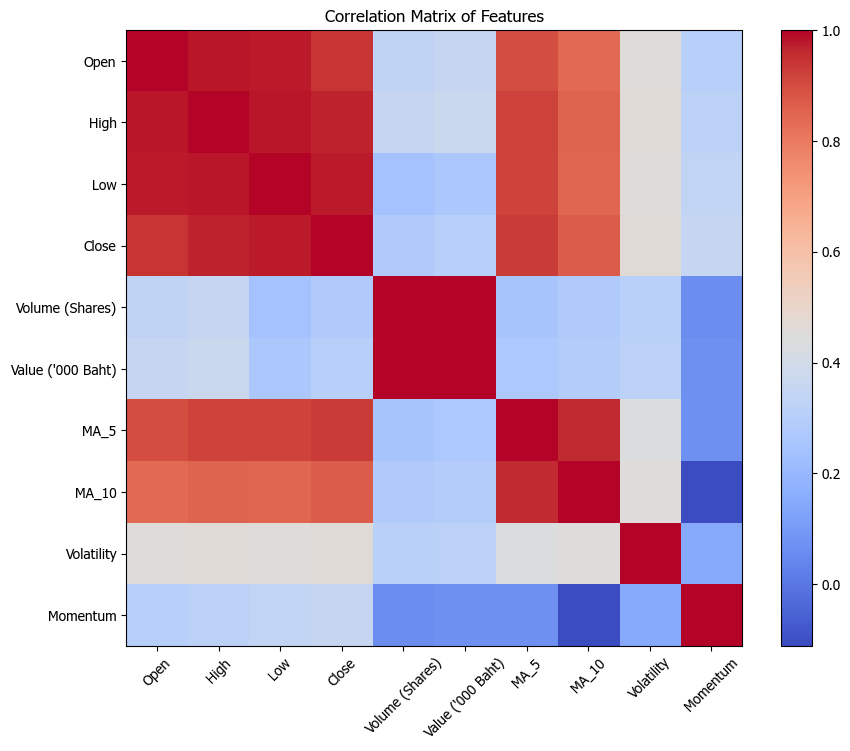

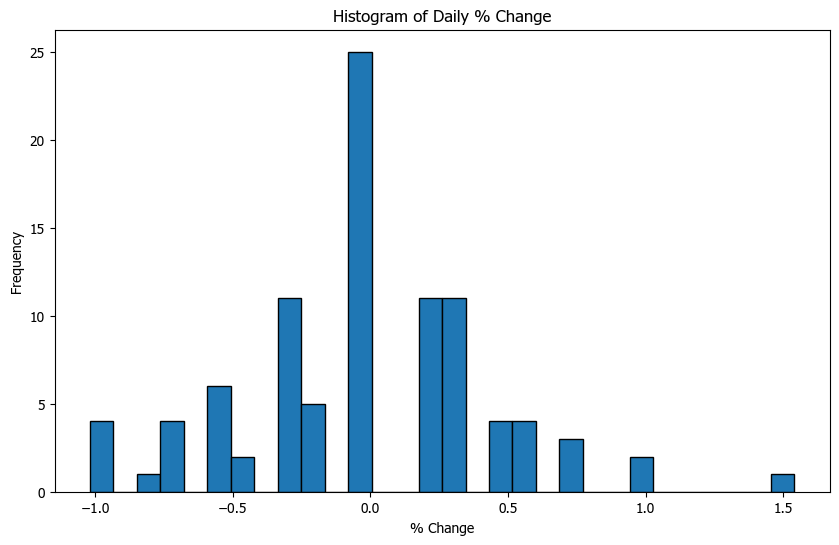

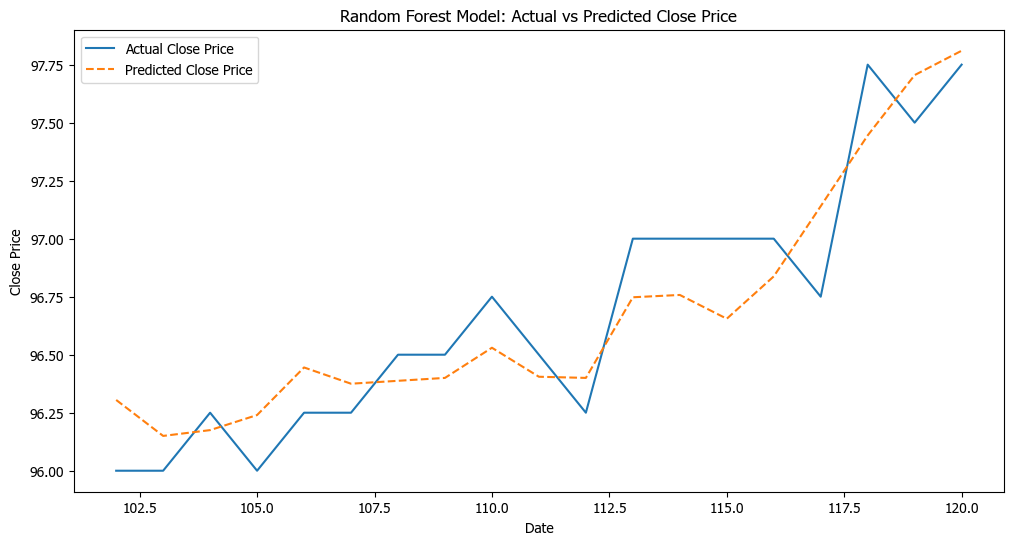

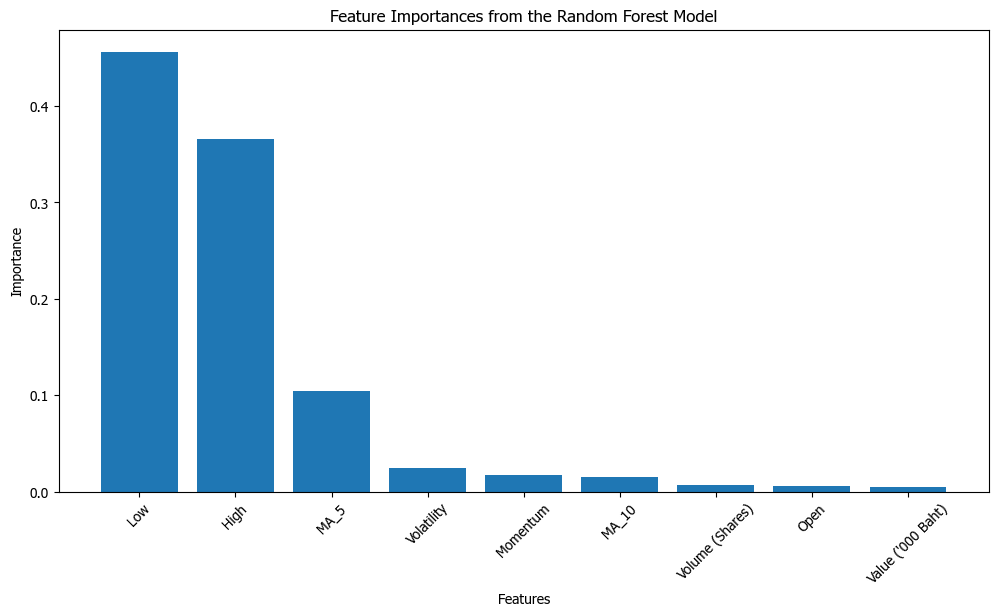

['random_forest_model.pkl']

In [65]:
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['Volatility'] = df['Close'].rolling(window=5).std()
df['Momentum'] = df['Close'] - df['Close'].shift(5)
df = df.dropna()

# Plot Close Price with 5-Day and 10-Day Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Close Price")
plt.plot(df.index, df["MA_5"], label="5-Day MA")
plt.plot(df.index, df["MA_10"], label="10-Day MA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Close Price with 5-Day and 10-Day Moving Averages")
plt.legend()
plt.show()


# Correlation Matrix of Selected Features
features_for_corr = ["Open", "High", "Low", "Close", 
                       "Volume (Shares)", "Value ('000 Baht)", 
                       "MA_5", "MA_10", "Volatility", "Momentum"]
corr_matrix = df[features_for_corr].corr()

# Plot Correlation Matrix of Features
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Matrix of Features")
plt.show()

# Plot Histogram of Daily % Change
plt.figure(figsize=(10, 6))
plt.hist(df["% Change"], bins=30, edgecolor='black')
plt.xlabel("% Change")
plt.ylabel("Frequency")
plt.title("Histogram of Daily % Change")
plt.show()

# Prepare features and target variable
features = ["Open", "High", "Low", "Volume (Shares)", "Value ('000 Baht)",
            "MA_5", "MA_10", "Volatility", "Momentum"]
target = "Close"
X = df[features]
y = df[target]

# Time Series Cross-Validation with Random Forest
tscv = TimeSeriesSplit(n_splits=5)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation scores (MSE and R2)
mse_scores = -cross_val_score(rf_model, X, y, cv=tscv, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf_model, X, y, cv=tscv, scoring='r2')

# Train-Test Split for Final Evaluation (80% train, 20% test)
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Train the Random Forest model
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate on the test set
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Plotting Actual vs Predicted Close Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Close Price")
plt.plot(y_test.index, y_pred, label="Predicted Close Price", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Random Forest Model: Actual vs Predicted Close Price")
plt.legend()
plt.show()

# Feature Importance Analysis
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot Feature Importances from the Random Forest Model
plt.figure(figsize=(12, 6))
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances from the Random Forest Model")
plt.show()
joblib.dump(rf_model, 'random_forest_model.pkl')

In [60]:
print("Cross-validated Mean Squared Error:", mse_scores.mean())
print("Cross-validated R2 Score:", r2_scores.mean())
print("Test Mean Squared Error:", mse_test)
print("Test R2 Score:", r2_test)

Cross-validated Mean Squared Error: 0.15597576388888867
Cross-validated R2 Score: 0.13612905988559162
Test Mean Squared Error: 0.06909565217391303
Test R2 Score: 0.7634200647249192


<h1><b>HistGradientBoostingRegressor</b><h1>

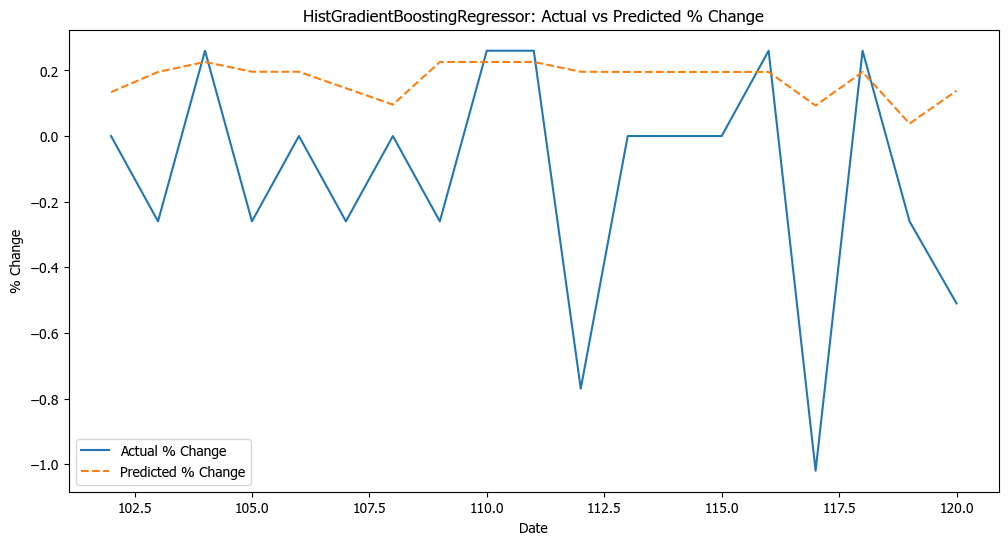

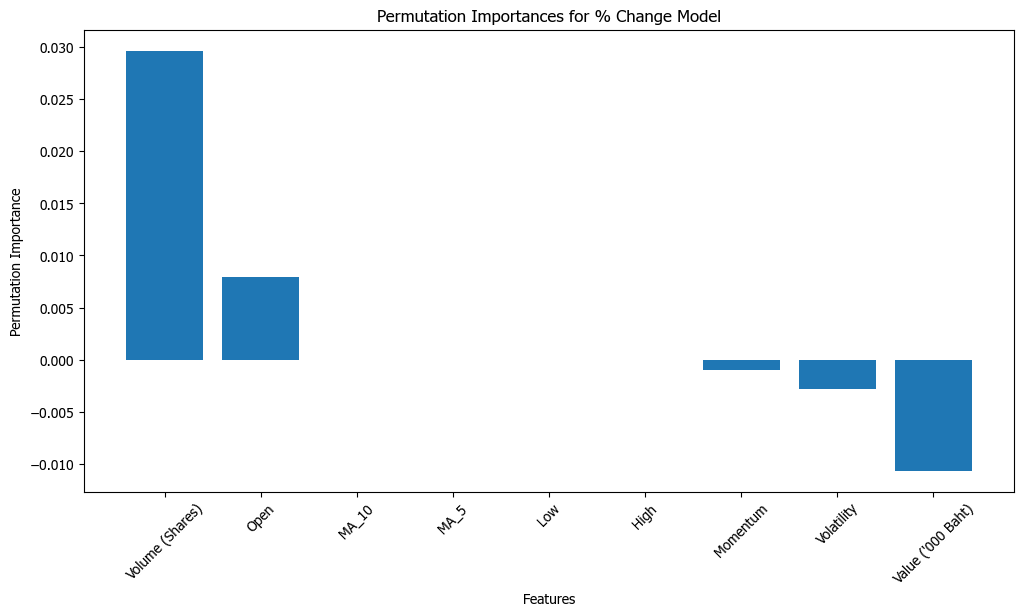

HGB CV MSE (% Change): 0.22027619616073676
HGB CV R2  (% Change): -0.2557185666386219
HGB Test MSE   (% Change): 0.19408596193716232
HGB Test R2    (% Change): -0.6096321099074073


['hist_gradient_boosting_model.pkl']

In [66]:
# ─── New Section: HistGradientBoosting + Permutation Importances ─────────────

from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance

# Prepare features and target for % Change
X_pct = df[features]
y_pct = df["% Change"]

# TimeSeriesSplit CV
tscv_pct   = TimeSeriesSplit(n_splits=5)
hgb_model  = HistGradientBoostingRegressor(random_state=42)
mse_cv_pct = -cross_val_score(hgb_model, X_pct, y_pct,
                              cv=tscv_pct,
                              scoring='neg_mean_squared_error')
r2_cv_pct  =  cross_val_score(hgb_model, X_pct, y_pct,
                              cv=tscv_pct,
                              scoring='r2')

# Train/Test Split
X_train_pct, X_test_pct = X_pct.iloc[:split_index], X_pct.iloc[split_index:]
y_train_pct, y_test_pct = y_pct.iloc[:split_index], y_pct.iloc[split_index:]

# Fit and predict
hgb_model.fit(X_train_pct, y_train_pct)
y_pred_pct = hgb_model.predict(X_test_pct)

# Evaluate
mse_test_pct = mean_squared_error(y_test_pct, y_pred_pct)
r2_test_pct  = r2_score(y_test_pct, y_pred_pct)

# Plot Actual vs Predicted % Change
plt.figure(figsize=(12, 6))
plt.plot(y_test_pct.index, y_test_pct, label="Actual % Change")
plt.plot(y_test_pct.index, y_pred_pct, '--', label="Predicted % Change")
plt.xlabel("Date")
plt.ylabel("% Change")
plt.title("HistGradientBoostingRegressor: Actual vs Predicted % Change")
plt.legend()
plt.show()

# —– Permutation Importances —–
perm_imp = permutation_importance(
    hgb_model, X_test_pct, y_test_pct,
    n_repeats=10, random_state=42, scoring='neg_mean_squared_error'
)
importances_pct = perm_imp.importances_mean
indices_pct     = np.argsort(importances_pct)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(features)), importances_pct[indices_pct], align='center')
plt.xticks(range(len(features)),
           [features[i] for i in indices_pct],
           rotation=45)
plt.xlabel("Features")
plt.ylabel("Permutation Importance")
plt.title("Permutation Importances for % Change Model")
plt.show()

# Print out CV and test metrics
print("HGB CV MSE (% Change):", mse_cv_pct.mean())
print("HGB CV R2  (% Change):", r2_cv_pct.mean())
print("HGB Test MSE   (% Change):", mse_test_pct)
print("HGB Test R2    (% Change):", r2_test_pct)
joblib.dump(hgb_model, 'hist_gradient_boosting_model.pkl')
